In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt


time: 1.84 s (started: 2021-05-25 19:46:02 +00:00)


In [ ]:
# from tensorflow.keras import mixed_precision

# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

time: 1.23 ms (started: 2021-05-25 19:46:04 +00:00)


In [ ]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    data_dir = "/content/drive/MyDrive/Colab Notebooks/Datasets/TensorflowDatasets",
    split=['train[:80%]', 'train[80%:]', 'test'],
    
    with_info=True,
    as_supervised=True
)



time: 614 ms (started: 2021-05-25 19:46:04 +00:00)


In [ ]:
print(ds_info)

tfds.core.DatasetInfo(
    name='emnist',
    version=3.0.0,
    description='The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.

Note: Like the original EMNIST data, images provided here are inverted horizontally and rotated 90 anti-clockwise. You can use `tf.transpose` within `ds.map` to convert the images to a human-friendlier format.',
    homepage='https://www.nist.gov/itl/products-and-services/emnist-dataset',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=47),
    }),
    total_num_examples=131600,
    splits={
        'test': 18800,
        'train': 112800,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{cohen_afshar_tapson_schaik_2017,
        title={EMNIST: Extending MNIST to handwritten lette

In [ ]:
print(type(ds_train))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
time: 1.55 ms (started: 2021-05-25 19:46:05 +00:00)


In [ ]:
# get_label_name = ds_info.features['label'].int2str

# image, label = next(iter(ds_train))
# _ = plt.imshow(image)
# _ = plt.title(get_label_name(label))

time: 1.04 ms (started: 2021-05-25 19:46:05 +00:00)


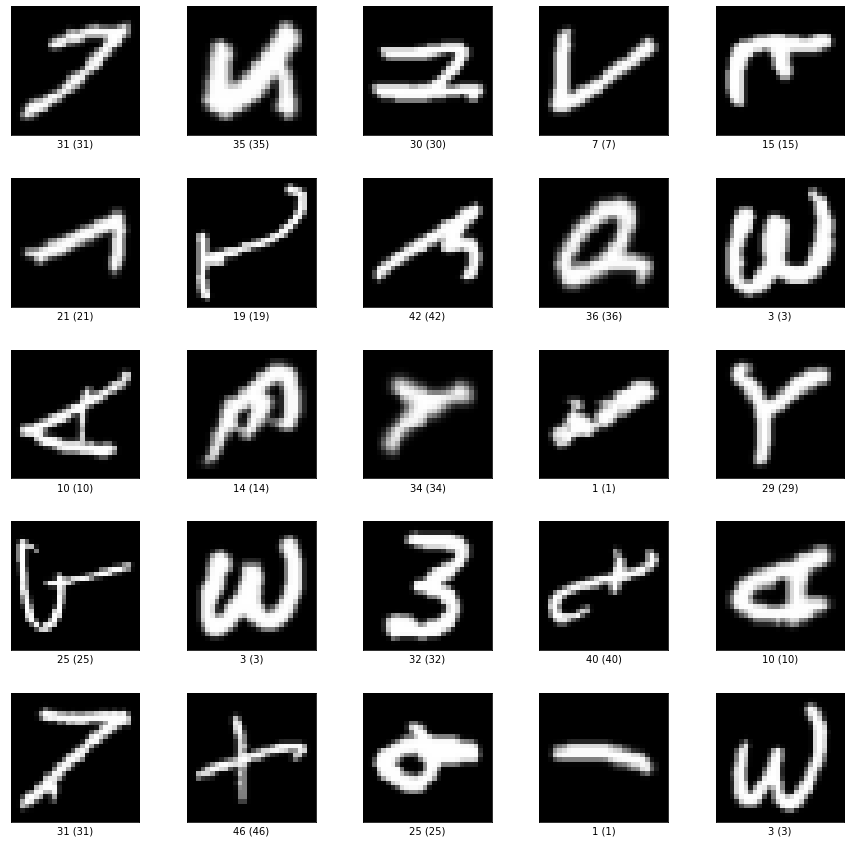

time: 978 ms (started: 2021-05-25 19:46:05 +00:00)


In [ ]:
fig = tfds.show_examples(ds_train, ds_info, rows = 5, cols = 5)

In [ ]:
img_height = img_width = 32

print(img_height)
print(img_width)


AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 64







32
32
time: 3.48 ms (started: 2021-05-25 19:46:06 +00:00)


In [ ]:
def downscale_img(image, label):
  image = tf.image.resize(image, [img_height, img_width])
  # image = tf.reshape(-1,img_height*img_width)
  return image, label



ds_train = ds_train.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_val = ds_val.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.map(downscale_img, num_parallel_calls=AUTOTUNE)


time: 65.9 ms (started: 2021-05-25 19:46:06 +00:00)


In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

def configure_for_performance(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    # ds = ds.cache("Cache")
    ds = ds.shuffle(buffer_size=256)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# def configure_for_performance_2(ds):
#     ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
#     ds = ds.cache("Cache")
#     ds = ds.shuffle(buffer_size=256)
#     ds = ds.batch(BATCH_SIZE)
#     ds = ds.prefetch(buffer_size=AUTOTUNE)
#     return ds

def configure_for_performance_3(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

time: 9.93 ms (started: 2021-05-25 19:46:06 +00:00)


In [ ]:
ds_train = configure_for_performance(ds_train)
ds_val = configure_for_performance_3(ds_val)
ds_test = configure_for_performance_3(ds_test)


time: 46.8 ms (started: 2021-05-25 19:46:06 +00:00)


In [ ]:
for image, label in ds_train.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

for image, label in ds_val.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
    
for image, label in ds_test.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())


Image shape:  (64, 32, 32, 1)
Label:  [26 19  2 40  8 19 12 24  3 46 46 43  8 41  3 18 30 16 16 35 28  4 26 35
 10 42 31 37 12 31 22 33 30 41 25 24 21 31 17 26  0 23 13  2 38 13 34 34
 15 18 46 25 34 39  5 43 36  0 17 24 26 24 22 44]
Image shape:  (64, 32, 32, 1)
Label:  [ 8 37 23 18 23 29  9 23 30 39  5 35 17  9 34  7 29  4  7 35 44 22 24  0
 32  4 19 40 32 36  0  7  6 24  3 45 27 14 43 46  1 21 38  2 12 28 26  5
 34 45 43 45 20 26 16 38 16 23 11  5 42 38 26 30]
Image shape:  (64, 32, 32, 1)
Label:  [36 11 31 44 46 11  2 15 30 44 42 20 15 43 35 26 41 11 33 22 44 22 28 23
 11 33 27 16 25 42 41 17 32 31 28 24 16 46 32 32  6 10  7 22 35 29  5  1
 34 11  8 19 26 33 44 11  2  4  4 30  0 45 13 25]
time: 303 ms (started: 2021-05-25 19:46:06 +00:00)


In [ ]:
num_classes = ds_info.features["label"].num_classes


# Creating model
model = tf.keras.applications.EfficientNetB0(
    include_top=False, input_shape=(img_height, img_width, 1),
    classes=num_classes, weights=None) #, pooling='avg')


x = model.output

x = layers.GlobalAveragePooling2D()(x)

# output layer
predictions = layers.Dense(num_classes, activation="softmax")(x)

model = Model(inputs = model.input, outputs = predictions)
  
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 32, 32, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 32, 32, 1)    3           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 1)    0           normalization[0][0]              
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import Adamax

# Model compilation
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adamax(0.0001),
              metrics=['accuracy'])


# Training model
model_history = model.fit(ds_train,
                          epochs=50,
                          validation_data=ds_val,
                          verbose=1)


path = '/content/drive/MyDrive/Colab Notebooks/Notebooks/Models/EfficientNetB0_EMNIST_Balanced_Base/'
model.save(path)

Epoch 1/50
1410/1410 [==============================] - 80s 51ms/step - loss: 3.7308 - accuracy: 0.0707 - val_loss: 3.4075 - val_accuracy: 0.1338
Epoch 2/50
1410/1410 [==============================] - 75s 53ms/step - loss: 3.1309 - accuracy: 0.1702 - val_loss: 2.6732 - val_accuracy: 0.2773
Epoch 3/50
1410/1410 [==============================] - 70s 50ms/step - loss: 2.4650 - accuracy: 0.3069 - val_loss: 1.9472 - val_accuracy: 0.4380
Epoch 4/50
1410/1410 [==============================] - 70s 50ms/step - loss: 1.8593 - accuracy: 0.4503 - val_loss: 1.4087 - val_accuracy: 0.5759
Epoch 5/50
1410/1410 [==============================] - 70s 50ms/step - loss: 1.4134 - accuracy: 0.5680 - val_loss: 1.0444 - val_accuracy: 0.6710
Epoch 6/50
1410/1410 [==============================] - 75s 53ms/step - loss: 1.1075 - accuracy: 0.6524 - val_loss: 0.8530 - val_accuracy: 0.7216
Epoch 7/50
1410/1410 [==============================] - 70s 50ms/step - loss: 0.9151 - accuracy: 0.7068 - val_loss: 0.7114 -

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Notebooks/Models/EfficientNetB0_EMNIST_Balanced_Base/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Notebooks/Models/EfficientNetB0_EMNIST_Balanced_Base/assets


time: 1h 3min 22s (started: 2021-05-25 19:46:07 +00:00)


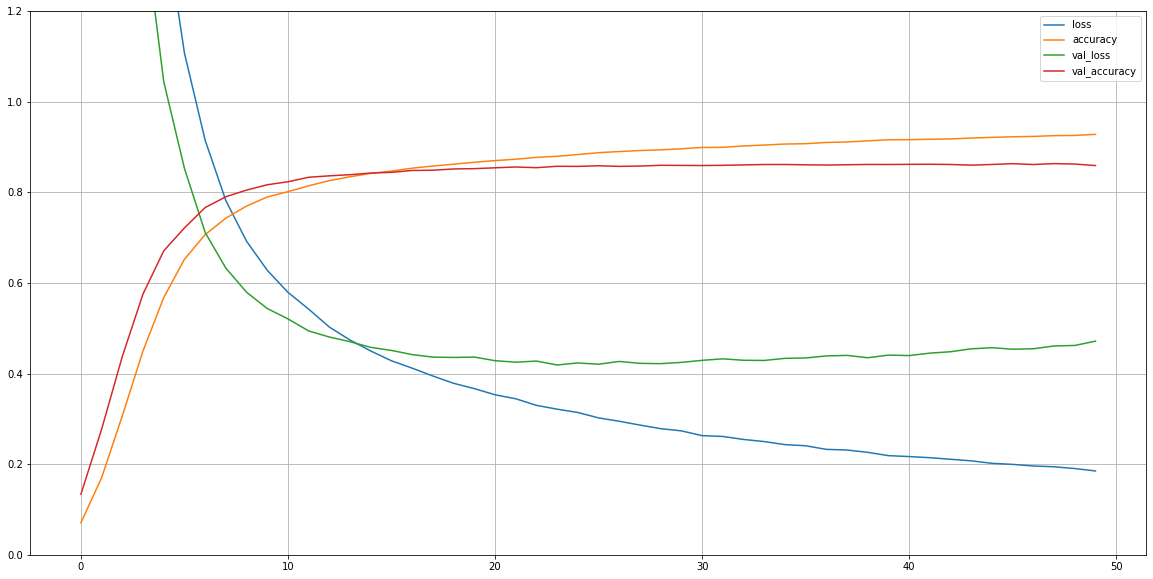

time: 402 ms (started: 2021-05-25 21:48:51 +00:00)


In [ ]:
img_path = path + 'Graph'

pd.DataFrame(model_history.history).plot(figsize=(20, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.savefig(img_path)
plt.show()

In [ ]:
loss_value, acc = model.evaluate(ds_test)

print(f"Test Accuracy: {(acc*100):.3f}%")
print(f"Loss: {loss_value:.3f}%")

294/294 [==============================] - 6s 20ms/step - loss: 0.4888 - accuracy: 0.8567
Test Accuracy: 85.670%
Loss: 0.489%
time: 10.3 s (started: 2021-05-25 20:49:30 +00:00)
